# QCoDeS Example with DynaCool PPMS

This notebook explains how to control the DynaCool PPMS from QCoDeS.

For this setup to work, the proprietary `PPMS Dynacool` application (or, alternatively `Simulate PPMS Dynacool`) must be running on some PC. On that same PC, the `server.py` script (found in `qcodes/instrument_drivers/QuantumDesign/DynaCoolPPMS/private`) must be running. The script can be run from the command line with no arguments and will run under python 3.6+.

The architecture is as follows:

The QCoDeS driver sends strings via VISA to the server who passes those same strings on to the `CommandHandler` (found in `qcodes/instrument_drivers/QuantumDesign/DynaCoolPPMS/commandhandler`). The `CommandHandler` makes the calls into the proprietary API. The QCoDeS driver can thus be called on any machine that can communicate with the machine hosting the server.

Apart from that, the driver is really simple. For this notebook, we used the `Simulate PPMS Dynacool` application running on the same machine as QCoDeS.

In [1]:
%matplotlib notebook
from qcodes.instrument_drivers.QuantumDesign.DynaCoolPPMS.DynaCool import DynaCool

To instantiate the driver, simply provide the address and port in the standard VISA format.
The connect message is not too pretty, but there does not seem to be a way to query serial and firmware versions.

In [2]:
dynacool = DynaCool('dynacool', address="TCPIP0::127.0.0.1::5000::SOCKET")

Connected to:  DynaCool dynacool (serial:N/A, firmware:N/A) in 0.12s


To get an overview over all available parameters, use `print_readable_snapshot`.

In [4]:
dynacool.print_readable_snapshot(update=True)

dynacool:
	parameter           value
--------------------------------------------------------------------------------
IDN                  :	{'vendor': ' DynaCool', 'model': 'dynacool', 'serial':...
chamber_state        :	sealed 
chamber_temperature  :	283 (K)
field                :	253 (A/m)
field_approach       :	linear 
field_rate           :	0.1 (A/m/s)
field_setpoint       :	0.1 (A/m)
magnet_state         :	holding 
temperature          :	283 (K)
temperature_rate     :	0.016667 (K/s)
temperature_setpoint :	283 (K)
temperature_settling :	no overshoot 
temperature_state    :	stable 
timeout              :	5 (s)


## Temperature Control

As soon as ANY of the temperature rate, the temperature setpoint, or the temperature settling mode parameters has been set, the system will start moving to the given temperature setpoint at the given rate using the given settling mode.

The system can continuously be queried for its temperature.

In [5]:
from time import sleep
import matplotlib.pyplot as plt
import numpy as np

# example 1

dynacool.temperature_rate(0.1)
dynacool.temperature_setpoint(280)

temps = []

while dynacool.temperature_state() == 'tracking':
    temp = dynacool.temperature()
    temps.append(temp)
    sleep(0.75)
    print(f'Temperature is now {temp} K')



Temperature is now 283.0 K
Temperature is now 282.8999938964844 K
Temperature is now 282.79998779296875 K
Temperature is now 282.6999816894531 K
Temperature is now 282.6999816894531 K
Temperature is now 282.5999755859375 K
Temperature is now 282.4999694824219 K
Temperature is now 282.39996337890625 K
Temperature is now 282.39996337890625 K
Temperature is now 282.2999572753906 K
Temperature is now 282.199951171875 K
Temperature is now 282.0999450683594 K
Temperature is now 282.0999450683594 K
Temperature is now 281.99993896484375 K
Temperature is now 281.8999328613281 K
Temperature is now 281.7999267578125 K
Temperature is now 281.7999267578125 K
Temperature is now 281.6999206542969 K
Temperature is now 281.59991455078125 K
Temperature is now 281.4999084472656 K
Temperature is now 281.4999084472656 K
Temperature is now 281.39990234375 K
Temperature is now 281.2998962402344 K
Temperature is now 281.19989013671875 K
Temperature is now 281.19989013671875 K
Temperature is now 281.0998840332

<IPython.core.display.Javascript object>


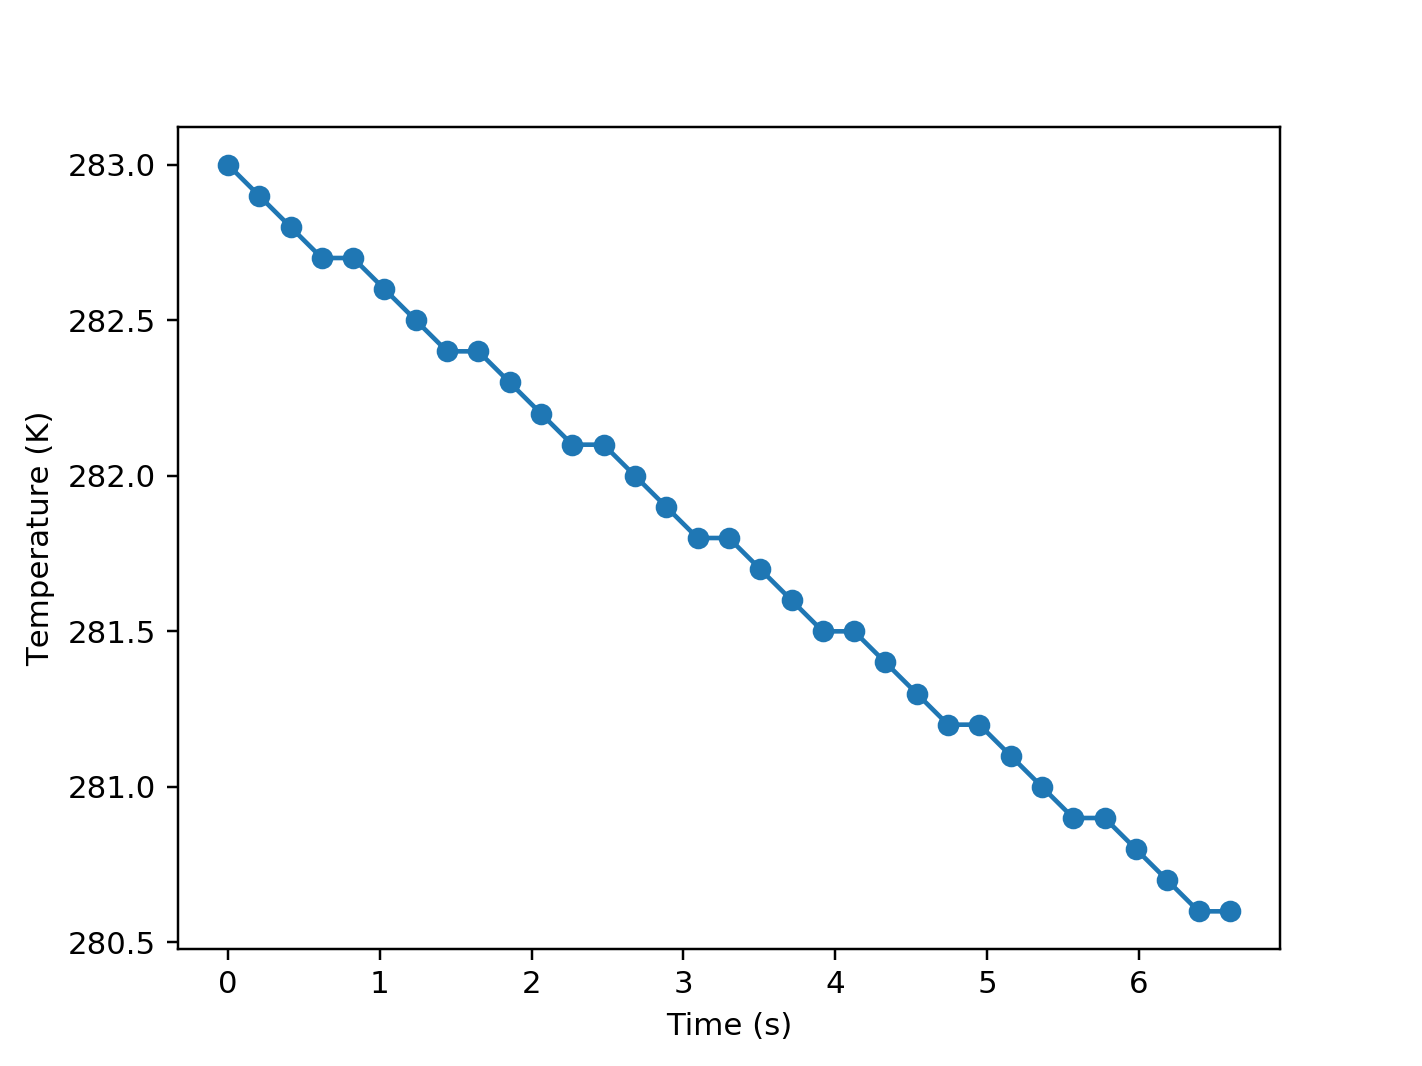

In [6]:
plt.figure()
timeax = np.linspace(0, len(temps)*0.2, len(temps))
plt.plot(timeax, temps, '-o')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)')

## Field Control

As soon as ANY of the field rate, the field setpoint, or the field approach parameters has been set, the system will start moving to the given field setpoint at the given rate using the given approach.

Using the simulation software, the field change is instanteneous irrespective of rate.